# Figures

In [1]:
import dill as pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
%matplotlib inline

import sys; sys.path.append('../')
from common import col, svg, plot_pdf

from box import Box
from common import plot_pdf, samples_nd, col, svg
from support_files.pickle_macos import pickle_load
from tqdm import tqdm

%matplotlib inline

dats = pickle.load(open('support_files/manualfit_params.pkl', 'rb'))
mats = Box(pickle_load('support_files/pow1_mats_comp.pkl'))
protocols = ['ap', 'act', 'inact', 'deact', 'ramp']

!mkdir -p svg/

## Panel for model curves

In [2]:
df = pickle.load(open('./support_files/manualfit_curves_complete_df.pkl','rb'))

In [3]:
channel = df[(df['Name'].str.contains("khva"))]
channel

,Name,Type,Variable,Group,Trace
3375,./raw_data/K/3434_khva.mod/khva.n.inf.dat,K,INF,PS,"0 [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
7370,./raw_data/K/3434_khva.mod/khva.n.tau.dat,K,TAU,UNKOWN,"0 [[0.05, 0.06, 0.08, 0.1, 0.13, 0.16, 0.2,..."


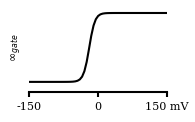

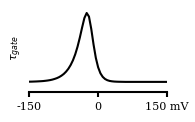

In [4]:
color = 'black'

traces = {}
traces['inf'] = channel.iloc[0]['Trace'][0].T
traces['tau'] = channel.iloc[1]['Trace'][0].T

V = np.linspace(-150,150,61)

for name, trace in traces.items():
    with mpl.rc_context(fname='../.matplotlibrc'):
        plt.figure(figsize=(4.5/2.54, 2.5/2.54))

        plt.plot(V, trace, color=color)

        plt.xlim([-150, 150])
        plt.xticks([-150, 0, 150], ['-150', '0', '150 mV'])
        plt.xlabel('')

        plt.yticks([])
        plt.ylabel(r'$\infty_{gate}$' if name == 'inf' else r'$\tau_{gate}$')

        sns.despine(left=True, offset=5)

        plt.savefig('svg/panel_model_{}.svg'.format(name), transparent=True)

## Panels for traces and posterior

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import dill as pickle

from delfi.distribution import TransformedNormal
from model.ChannelOmni import ChannelOmni
from model.ChannelOmniStats import ChannelOmniStats as ChannelStats
from support_files.pickle_macos import pickle_load
from scipy.optimize import minimize

from support_files.pickle_macos import pickle_load
from box import Box

mats = Box(pickle_load('support_files/pow1_mats_comp.pkl'))

### Inference on example channel

In [ ]:
ix = idx_chan = 120
name_gt = mats['ap']['names'][idx_chan]
print(name_gt)
    
trace_gt = {
    'v_act':   {'data' : mats['act']['data'][idx_chan,   6:, 1:].T, 'time' : mats['act']['data'][idx_chan,   6:, 0].T},
    'v_inact': {'data' : mats['inact']['data'][idx_chan, 6:, 1:].T, 'time' : mats['inact']['data'][idx_chan,   6:, 0].T},
    'v_deact': {'data' : mats['deact']['data'][idx_chan, 6:, 1:].T, 'time' : mats['deact']['data'][idx_chan,   6:, 0].T},
    'v_ap':    {'data' : mats['ap']['data'][idx_chan,    6:, 1:].T, 'time' : mats['ap']['data'][idx_chan,   6:, 0].T},
    'v_ramp':  {'data' : mats['ramp']['data'][idx_chan,  6:, 1:].T, 'time' : mats['ramp']['data'][idx_chan,   6:, 0].T},
}

stats_gt = s.calc([trace_gt])
stats_gt_norm = stats_gt
posterior = res.predict(stats_gt_norm.astype(np.float32), deterministic=True)

### GT

In [ ]:
protocols = ['ap', 'act', 'ramp']  # ['ap', 'act', 'inact', 'deact', 'ramp']

with mpl.rc_context(fname='../.matplotlibrc'):
    plt.figure(figsize=(12/2.54, 2.5/2.54))

    for p, protocol in enumerate(protocols):      
        plt.subplot(1, 3, p+1)
        mat = mats[protocol].data[ix,:,:]
        
        #plt.title("{1} : {0}".format(protocol, mats[protocol].names[ix]))
        
        if p == 0:
            plt.ylabel('current')
            
        if p == 1:
            plt.title('observation')

        cm = sns.light_palette(col['GT'], mat.shape[1])
                
        N = mat.shape[1]-1
        if N == 1:
            plt.gca().set_prop_cycle('color',[cm[-1]])
        else:
            plt.gca().set_prop_cycle('color',cm)
        
        plt.plot(trace_gt['v_' + protocol]['time'], trace_gt['v_' + protocol]['data'].T, linewidth=1.);  # usually 1.5

        plt.xticks([])
        plt.yticks([])
        sns.despine(left=True, bottom=True, offset=5)

        plt.plot([0., 100.],[-0.1, -0.1], color='k', linewidth=2)
        plt.text(0.0, -0.4, '100ms', fontsize=8)

    PANEL_GT = 'svg/posterior_gt.svg'
    plt.savefig(PANEL_GT, transparent=True)
    #plt.close()
    
#svg(PANEL_GT)

### Sample 1

In [ ]:
# Sample (via posterior.gen(1))
sam1 = np.array([[ 1.26382307e-01,  2.34724258e+00, -7.33582510e+01,
         8.95541459e+02,  4.39435624e-01,  8.46091437e-04,
         1.50227734e-02,  5.05728615e-04]])
trace_sam1 = m.gen_single(sam1.reshape(-1))

protocols = ['ap', 'act', 'ramp']  # ['ap', 'act', 'inact', 'deact', 'ramp']

gt_col = (35/255, 86/255, 167/255)

with mpl.rc_context(fname='../.matplotlibrc'):
    plt.figure(figsize=(12/2.54, 2.5/2.54))

    for p, protocol in enumerate(protocols):      
        plt.subplot(1, 3, p+1)
        mat = mats[protocol].data[ix,:,:]
        
        #plt.title("{1} : {0}".format(protocol, mats[protocol].names[ix]))
        
        if p == 0:
            plt.ylabel('current')
        
        if p == 1:
            plt.title('sample 1')
        
        cm = sns.light_palette(col['CONSISTENT1'], mat.shape[1])
            
        N = mat.shape[1]-1
        if N == 1:
            plt.gca().set_prop_cycle('color',[cm[-1]])
        else:
            plt.gca().set_prop_cycle('color',cm)

        plt.plot(trace_sam1['v_' + protocol]['time'], trace_sam1['v_' + protocol]['data'].T, linewidth=1.);  # usually 1.5

        plt.xticks([])
        plt.yticks([])
        sns.despine(left=True, bottom=True, offset=5)

        #plt.plot([0., 100.],[-0.1, -0.1], color='k', linewidth=2)
        #plt.text(0.0, -0.4, '100ms', fontsize=8)

    PANEL_SAM1 = 'svg/posterior_sam1.svg'
    plt.savefig(PANEL_SAM1, transparent=True)
    plt.show()
    
#svg(PANEL_SAM1)

### Sample 2

In [ ]:
# Sample (via posterior.gen(1))
sam2 = np.array([[ 1.45095758e-01,  2.42705041e+00, -3.21785190e+01,
         8.16976505e+02,  1.36955244e-01,  2.05773538e-03,
         1.35503283e-01, -1.56107865e-04]])
trace_sam2 = m.gen_single(sam2.reshape(-1))

protocols = ['ap', 'act', 'ramp']  # ['ap', 'act', 'inact', 'deact', 'ramp']

gt_col = (35/255, 86/255, 167/255)

with mpl.rc_context(fname='../.matplotlibrc'):
    plt.figure(figsize=(12/2.54, 2.5/2.54))

    for p, protocol in enumerate(protocols):      
        plt.subplot(1, 3, p+1)
        mat = mats[protocol].data[ix,:,:]
        
        #plt.title("{1} : {0}".format(protocol, mats[protocol].names[ix]))
        
        if p == 1:
            plt.title('sample 2')
            
        if p == 0:
            plt.ylabel('current')
        
        
        cm = sns.light_palette(col['CONSISTENT2'], mat.shape[1])
                
        N = mat.shape[1]-1
        if N == 1:
            plt.gca().set_prop_cycle('color',[cm[-1]])
        else:
            plt.gca().set_prop_cycle('color',cm)

        plt.plot(trace_sam2['v_' + protocol]['time'], trace_sam2['v_' + protocol]['data'].T, linewidth=1.);  # usually 1.5

        plt.xticks([])
        plt.yticks([])
        sns.despine(left=True, bottom=True, offset=5)

        #plt.plot([0., 100.],[-0.1, -0.1], color='k', linewidth=2)
        #plt.text(0.0, -0.4, '100ms', fontsize=8)
        
        sns.despine(left=True, bottom=True, offset=5)


    PANEL_SAM2 = 'svg/posterior_sam2.svg'
    plt.savefig(PANEL_SAM2, transparent=True)
    #plt.close()
    plt.show()
    
#svg(PANEL_SAM2)

### Outlier

In [ ]:
out = [ 0.5,  8.,  80.,  500, 0.4, 0.04, 0.4, 0.04]
params_out = out
trace_out = m.gen_single(params_out)

protocols = ['ap', 'act', 'ramp']  # ['ap', 'act', 'inact', 'deact', 'ramp']

gt_col = (35/255, 86/255, 167/255)

with mpl.rc_context(fname='../.matplotlibrc'):
    plt.figure(figsize=(12/2.54, 2.5/2.54))

    for p, protocol in enumerate(protocols):      
        plt.subplot(1, 3, p+1)
        mat = mats[protocol].data[ix,:,:]
        
        #plt.title("{1} : {0}".format(protocol, mats[protocol].names[ix]))
        
        if p == 0:
            plt.ylabel('current')

        if p == 1:
            plt.title('outlier')
        
        cm = sns.light_palette(col['INCONSISTENT'], mat.shape[1])
                
        N = mat.shape[1]-1
        if N == 1:
            plt.gca().set_prop_cycle('color',[cm[-1]])
        else:
            plt.gca().set_prop_cycle('color',cm)

        plt.plot(trace_out['v_' + protocol]['time'], trace_out['v_' + protocol]['data'].T, linewidth=1.);  # usually 1.5

        plt.xticks([])
        plt.yticks([])
        sns.despine(left=True, bottom=True, offset=5)

        plt.plot([0., 100.],[-0.1, -0.1], color='k', linewidth=2)
        plt.text(0.0, -0.4, '100ms', fontsize=8)

    PANEL_OUT = 'svg/posterior_out.svg'
    plt.savefig(PANEL_OUT, transparent=True)
    #plt.close()
    
#svg(PANEL_OUT)

### Posterior (main paper and supplement)

In [ ]:
from delfi.utils.viz import samples_nd

# For supplement
fig_inches = (5.8, 5.8)

MPL_RC = '../.matplotlibrc'
with mpl.rc_context(fname=MPL_RC):
    fig, axes = samples_nd(posterior.gen(25000),
                           limits=prior_lims,
                           ticks=prior_lims,
                           labels=[f'$\\theta_{i}$' for i in range(1,9)],
                           fig_size=fig_inches,
                           diag='kde',
                           upper='kde',
                           hist_diag={'bins': 50},
                           hist_offdiag={'bins': 50},
                           kde_diag={'bins': 50, 'color': col['SNPE']},
                           kde_offdiag={'bins': 50},
                           points=[sam1, sam2, out],
                           points_offdiag={'markersize': 5},
                           points_colors=[col['CONSISTENT1'], col['CONSISTENT2'], col['INCONSISTENT']],
                           subset=[0,1,2,3,4,5]
    );

    plt.savefig('svg/posterior_partial.svg', facecolor='None', transparent=True)
    plt.show()

In [ ]:
from delfi.utils.viz import samples_nd

# For supplement
fig_inches = (3.8, 3.8)

MPL_RC = '../.matplotlibrc'
with mpl.rc_context(fname=MPL_RC):
    fig, axes = samples_nd(posterior.gen(25000),
                           limits=prior_lims,
                           ticks=prior_lims,
                           labels=[f'$\\theta_{i}$' for i in range(1,9)],
                           fig_size=fig_inches,
                           diag='kde',
                           upper='kde',
                           hist_diag={'bins': 50},
                           hist_offdiag={'bins': 50},
                           kde_diag={'bins': 50, 'color': col['SNPE']},
                           kde_offdiag={'bins': 50},
                           points=[sam1, sam2, out],
                           points_offdiag={'markersize': 5},
                           points_colors=[col['CONSISTENT1'], col['CONSISTENT2'], col['INCONSISTENT']],
    );

    plt.savefig('svg/posterior_full.svg', facecolor='None', transparent=True)
    plt.show()

### Compose

In [ ]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}

pxw = 720
pxh = 760


f = Figure("20.3cm", "22cm",
    #Grid(25, 25),

    Panel(
          SVG("../fig4_channelomics/illustration/illustration_a.svg").scale(svg_scale).move(20,0),
          Text("C", 0, 13, **kwargs_text),
    ).move(0, 115),
           
    Panel(
          SVG("../fig4_channelomics/illustration/illustration_b.svg").scale(svg_scale).move(19,0),
          Text("D", 0, 13, **kwargs_text),
    ).move(pxw/2, 115),
           
    Panel(
          SVG("svg/panel_model_inf.svg").scale(svg_scale).move(5, -5),
          SVG("svg/panel_model_tau.svg").scale(svg_scale).move(190,-5),
          Text("A", 0, 18, **kwargs_text),
    ).move(0, 0),

    Panel(
          SVG("svg/posterior_gt.svg").scale(svg_scale).move(0,-5),
          Text("B", 0, 18, **kwargs_text),
    ).move(pxw/2, 0),
           
    Panel(
          SVG("svg/posterior_full.svg").scale(svg_scale).move(35, 0),
          Text("E", -5, 23, **kwargs_text),
    ).move(5, 265),

    Panel(
          SVG("svg/posterior_sam1.svg").scale(svg_scale),
          SVG("svg/posterior_sam2.svg").scale(svg_scale).move(0, 93),
          SVG("svg/posterior_out.svg").scale(svg_scale).move(0, 182),
          Text("F", 2, 10, **kwargs_text),
    ).move(pxw/2, 280),

    Panel(
          SVG("results/net_maf/svg/112.svg").scale(svg_scale).move(5, -7),
          SVG("results/net_maf/svg/289.svg").scale(svg_scale).move(5, 120-12),
          SVG("results/net_maf/svg/205.svg").scale(svg_scale).move(pxw/2+20-10, -7),
          SVG("results/net_maf/svg/27.svg").scale(svg_scale).move(pxw/2+20-10, 120-12),
          Text("G", 0, 10, **kwargs_text),
    ).move(0, 575),
)

f.save("fig/fig4_channelomics.svg")
svg("fig/fig4_channelomics.svg")